# Portfolio Optimization

In [75]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

# Settings
plt.style.use('ggplot')

In [76]:
# Parameters
DAYS = 252
YEARS = 5
RF = 0.0424

tickers = [
    'AAPL', 'MSFT', 'COST', 'NKE', 'GOOG',
    'AAL', 'LHX', 'RTX', 'WMT', 'KO',
    'KMB', 'AMZN', 'JPM',  'AMD', 'GM',
    'MET', 'BAC', 'LEVI', 'NVDA', 'GAP'
]

# Download the data
# Use the past 5-years of daily returns
data = yf.download(tickers, period='5y', interval='1d', auto_adjust=True)['Close']

[*********************100%***********************]  20 of 20 completed


In [77]:
# Compute the daily returns
# Fill first Nan with 0
returns = data.pct_change()
returns.fillna(0, inplace=True)

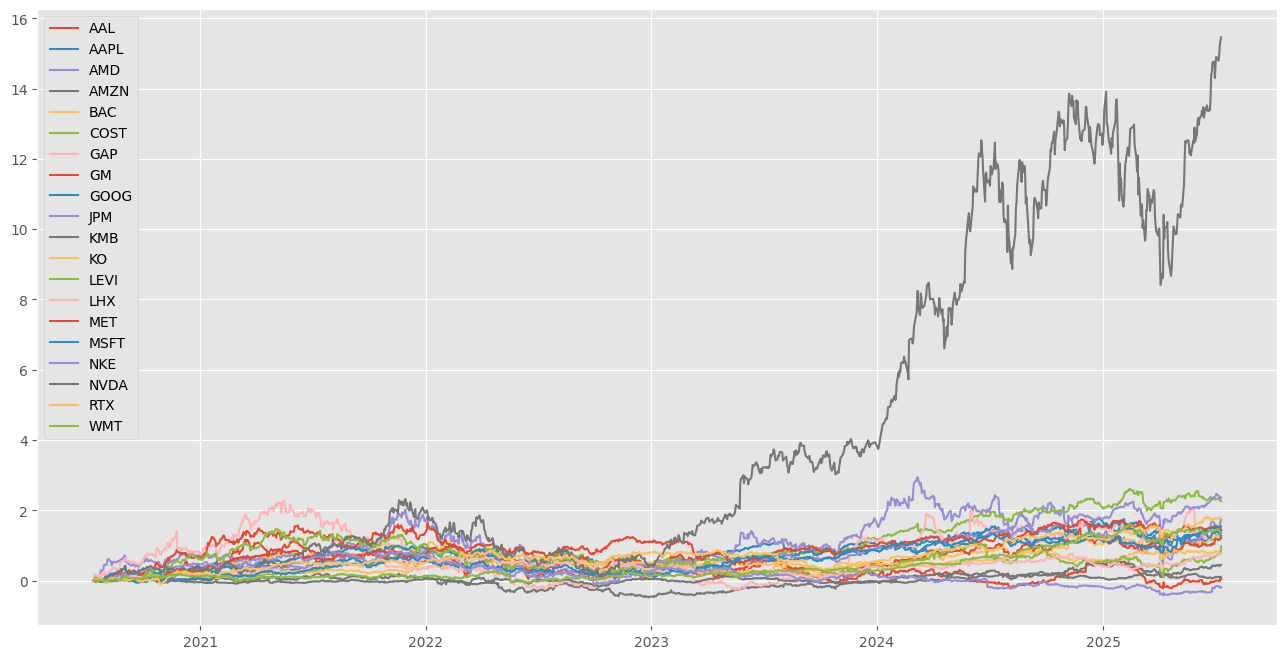

In [78]:
# Plot the cummulative returns of each stock
cumm_returns = (1 + returns).cumprod() - 1

plt.figure(figsize=(16, 8))
plt.plot(cumm_returns, label=cumm_returns.columns)
plt.legend()
plt.show()

In [79]:
# Compute the expected returns
expected_returns = (1 + cumm_returns.iloc[-1]) ** (1 / YEARS) - 1

In [80]:
# Calculate the covariance matrix
covariances = returns.cov() * DAYS

Given the formula for the portfolio's expected return and variance, optimize the weights such that the Sharpe Ratio is largest from the risk-free rate